In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Data Loading

df = pd.read_csv('scores_data.csv')
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [37]:
df.shape

(149, 6)

In [20]:
# Checking the Column Names
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [21]:
# The column names had the extra special charaters here am removing it

df.columns = df.columns.str.strip()
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [22]:
# Checking the Columns Name after Removing the Special Chraters

df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [23]:
# About Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [24]:
# Checking the Null values in the Data, there is No Null values 
df.isnull().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

In [25]:
# spliting the "Score_total" column into two separate columns and created one new Column with Percentage by calculating the percentage of sudent marks

df[['Score_Obtained', 'Score_Total']] = df['Score'].str.split('/', expand=True)

df['Score_Obtained'] = df['Score_Obtained'].astype(int)
df['Score_Total'] = df['Score_Total'].astype(int)

df['Percentage'] = (df['Score_Obtained'] / df['Score_Total']) * 100


In [26]:
#Checking the Data after creating the new columns

df.head()

,Batch,User_ID,Score,Score_Obtained,Score_Total,Percentage
0,AI_ELITE_7,uid_149,6 / 7,6,7,85.714286
1,AI_ELITE_7,uid_148,6 / 7,6,7,85.714286
2,AI_ELITE_7,uid_147,7 / 7,7,7,100.000000
3,AI_ELITE_7,uid_146,7 / 7,7,7,100.000000
4,AI_ELITE_7,uid_145,4 / 7,4,7,57.142857


In [28]:
# Batch Level Summery for each batch summery using the Groupe by "Batch" Column

batch_summary = df.groupby('Batch').agg(
    Students=('User_ID', 'count'),
    Avg_Score=('Score_Obtained', 'mean'),
    Avg_Percentage=('Percentage', 'mean'),
    Min_Score=('Score_Obtained', 'min'),
    Max_Score=('Score_Obtained', 'max')
).reset_index()

batch_summary


,Batch,Students,Avg_Score,Avg_Percentage,Min_Score,Max_Score
0,AI_ELITE_4,48,3.791667,54.166667,0,7
1,AI_ELITE_6,48,4.229167,60.416667,0,7
2,AI_ELITE_7,53,5.056604,72.237197,2,7


### Univariate Analysis – Score

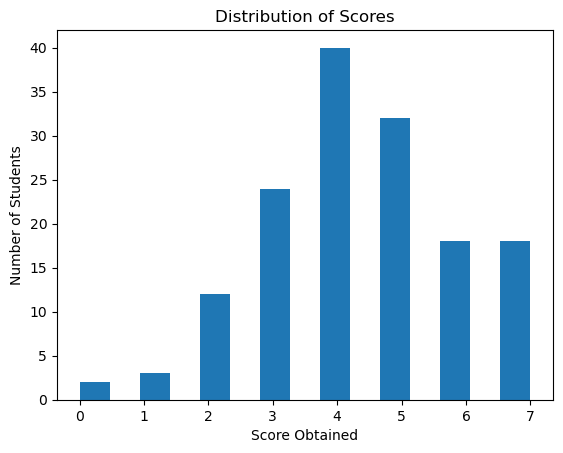

In [39]:
# Distribution of Scores (Histogram)

plt.figure()
plt.hist(df['Score_Obtained'], bins=15)
plt.xlabel("Score Obtained")
plt.ylabel("Number of Students")
plt.title("Distribution of Scores")
plt.show()

### Insight:

- Shows score concentration
- Identifies low-score and high-score dominance

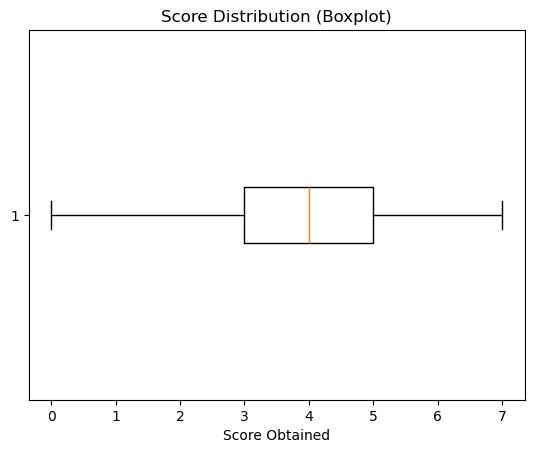

In [32]:
# Boxplot – Score (Outliers Check)

plt.figure()
plt.boxplot(df['Score_Obtained'], vert=False)
plt.xlabel("Score Obtained")
plt.title("Score Distribution (Boxplot)")
plt.show()

### Insight:

- Detects extreme low performers
- Checks score spread and skewness

In [33]:
# Descriptive Statistics – Score

df['Score_Obtained'].describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score_Obtained, dtype: float64

### Univariate Analysis – Batch

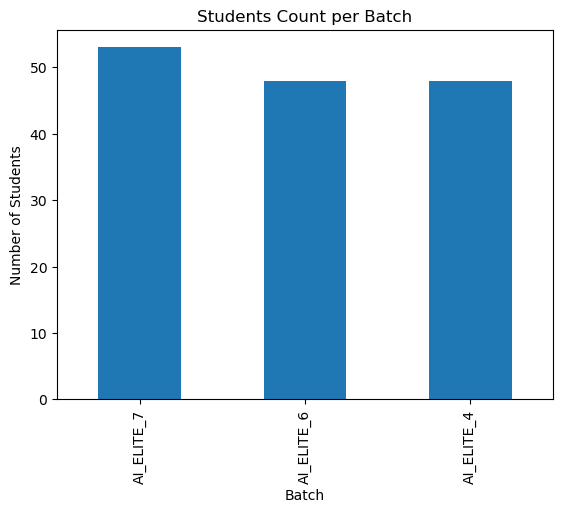

In [34]:
# Count of Students per Batch

plt.figure()
df['Batch'].value_counts().plot(kind='bar')
plt.xlabel("Batch")
plt.ylabel("Number of Students")
plt.title("Students Count per Batch")
plt.show()

### Insight:

- Confirms batch sizes
- Ensures fairness in comparison

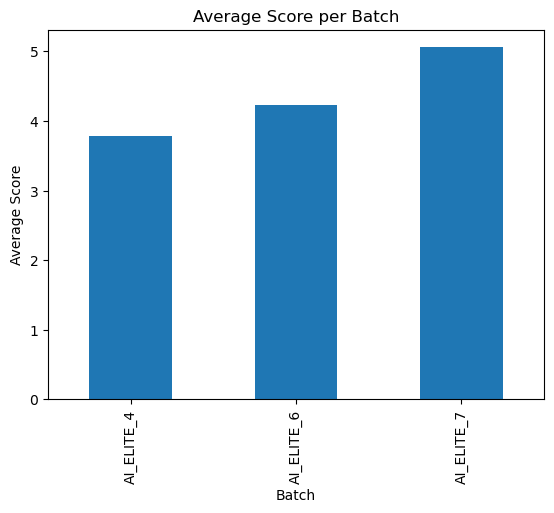

In [35]:
# Average Score per Batch (Bar Chart)

plt.figure()
df.groupby('Batch')['Score_Obtained'].mean().plot(kind='bar')
plt.xlabel("Batch")
plt.ylabel("Average Score")
plt.title("Average Score per Batch")
plt.show()

### Insight:

- Clear performance comparison
- Identifies strongest vs weakest batch

<Figure size 640x480 with 0 Axes>

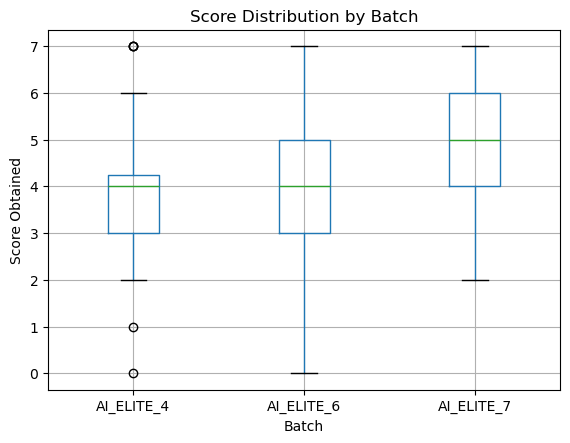

In [36]:
# Score Spread by Batch (Boxplot)

plt.figure()
df.boxplot(column='Score_Obtained', by='Batch')
plt.xlabel("Batch")
plt.ylabel("Score Obtained")
plt.title("Score Distribution by Batch")
plt.suptitle("")  # remove auto title
plt.show()

### Insight:

- Variance comparison across batches
- Consistency vs inconsistency detection
- ***Scores improve batch over batch,*** indicating learning or process improvements
- ***Earlier batches show higher variance,*** including zero scores
- ***Latest batch is more consistent,*** not just higher average
- Batch-level EDA strongly supports targeted intervention strategies